In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Load the Diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # Use only one feature (BMI)
y = diabetes.target

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Create a linear regression model
model = LinearRegression()

In [28]:
# Fit the model to the data
model.fit(X_train, y_train)


LinearRegression()

In [29]:

# Make predictions on the test set
y_pred = model.predict(X_test)


In [30]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 4061.83
R-squared: 0.23


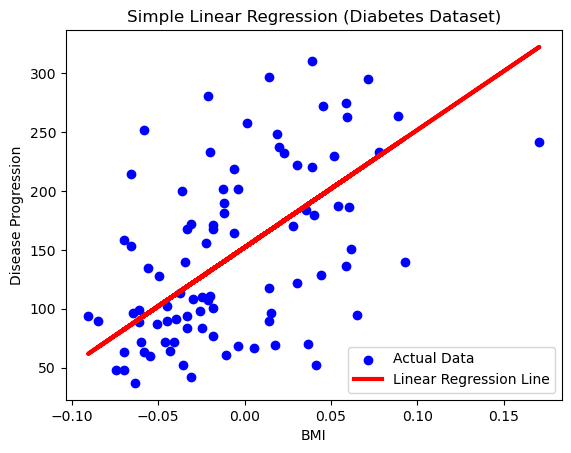

In [31]:
# Plot the data points and the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linear Regression Line')
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression (Diabetes Dataset)")
plt.legend()
plt.show()

In [32]:
# New data points (BMI values) for which you want to make predictions
new_data = np.array([25, 30, 35]).reshape(-1, 1)

# Use the trained model to make predictions for the new data
new_predictions = model.predict(new_data)

# Print the new predictions
for i, bmi in enumerate(new_data):
    print(f"New Prediction for BMI {bmi[0]}: {new_predictions[i]:.2f}")


New Prediction for BMI 25: 25116.45
New Prediction for BMI 30: 30109.33
New Prediction for BMI 35: 35102.22


# logistic regression

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [34]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Create a logistic regression model
logistic_model = LogisticRegression()

In [37]:
# Fit the model to the training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

In [39]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [40]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


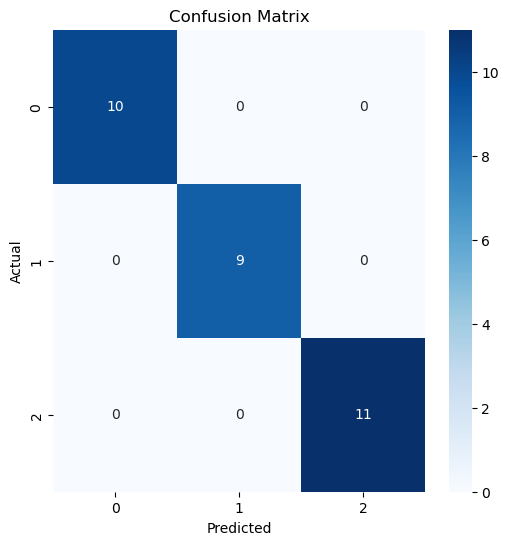

In [41]:
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [42]:
# New data points for which you want to make predictions
new_data = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Example iris setosa
    [6.2, 2.8, 4.8, 1.8],  # Example iris virginica
    [5.7, 3.0, 4.2, 1.2]   # Example iris versicolor
])

# Use the trained model to make predictions for the new data
new_predictions = logistic_model.predict(new_data)

# Map numeric class labels to corresponding iris species
iris_species = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
predicted_species = [iris_species[label] for label in new_predictions]

# Print the new predictions
for i, data_point in enumerate(new_data):
    print(f"Data Point {i+1}:")
    print(f"Features: {data_point}")
    print(f"Predicted Iris Species: {predicted_species[i]}\n")


Data Point 1:
Features: [5.1 3.5 1.4 0.2]
Predicted Iris Species: setosa

Data Point 2:
Features: [6.2 2.8 4.8 1.8]
Predicted Iris Species: virginica

Data Point 3:
Features: [5.7 3.  4.2 1.2]
Predicted Iris Species: versicolor



# Polynomialregression

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:3]  # Petal length (feature)
y = iris.data[:, 0]    # Sepal length (target)


In [5]:
# Create polynomial features (in this case, we'll use a quadratic polynomial)
degree = 2  # You can change the degree to experiment with different polynomial degrees
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [6]:
# Fit a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

In [7]:
# Generate a range of values for petal length for the graph
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)

In [8]:
# Predict sepal length on the new data points
y_pred = poly_reg.predict(X_range_poly)

Text(0.5, 1.0, 'Polynomial Regression on Iris Dataset')

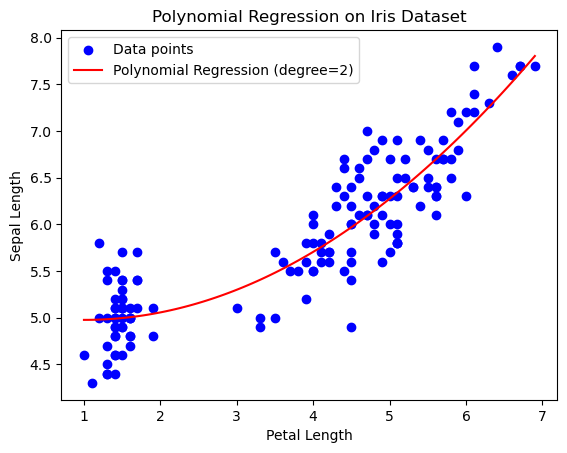

In [9]:
# Plot the data and the polynomial regression curve
plt.scatter(X, y, label='Data points', color='blue')
plt.plot(X_range, y_pred, label=f'Polynomial Regression (degree={degree})', color='red')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend()
plt.title('Polynomial Regression on Iris Dataset')
